In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
df = pd.read_csv("/home/deepp/rebelway/week04/CarPrice_Assignment.csv")

In [66]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [67]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# clean up data, transforming object to bool in case they have two values, or to int if they have more values
# keeping only the first part of CarName to get the brand and see if the price is connected to the brand name

In [69]:
df["fueltype"].unique()
fueltype = pd.get_dummies(df["fueltype"], drop_first=True)
fueltype

,gas
0,True
1,True
2,True
3,True
4,True
...,...
200,True
201,True
202,True
203,False


In [70]:
df.drop("fueltype", axis=1, inplace=True)
df = pd.concat([df,fueltype], axis=1, ignore_index=False)

In [71]:
df.head()

,car_ID,symboling,CarName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,gas
0,1,3,alfa-romero giulia,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,True
1,2,3,alfa-romero stelvio,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,True
2,3,1,alfa-romero Quadrifoglio,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,True
3,4,2,audi 100 ls,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,True
4,5,2,audi 100ls,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,True


In [72]:
df["doornumber"].unique()

array(['two', 'four'], dtype=object)

In [73]:
doornumber = pd.get_dummies(df["doornumber"], drop_first=True)
df.drop("doornumber", axis=1, inplace=True)
df = pd.concat([df,doornumber], axis=1, ignore_index=False)

In [74]:
df = df.rename(columns={"two": "twoDoors"})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   aspiration        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [75]:
df["enginelocation"].unique()

array(['front', 'rear'], dtype=object)

In [76]:
enginelocation = pd.get_dummies(df["enginelocation"], drop_first=True)
df.drop("enginelocation", axis=1, inplace=True)
df = pd.concat([df,enginelocation], axis=1, ignore_index=False)
df = df.rename(columns={"rear": "engineRear"})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   aspiration        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   wheelbase         205 non-null    float64
 7   carlength         205 non-null    float64
 8   carwidth          205 non-null    float64
 9   carheight         205 non-null    float64
 10  curbweight        205 non-null    int64  
 11  enginetype        205 non-null    object 
 12  cylindernumber    205 non-null    object 
 13  enginesize        205 non-null    int64  
 14  fuelsystem        205 non-null    object 
 15  boreratio         205 non-null    float64
 16  stroke            205 non-null    float64
 1

In [77]:
df["cylindernumber"].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [78]:
mapping = {"four": 4, "six": 6, "five": 5, "three": 3, "twelve": 12, "two": 2, "eight" : 8}
df["cylindernumber"] = df["cylindernumber"].map( mapping )
df["cylindernumber"]

0      4
1      4
2      6
3      4
4      5
      ..
200    4
201    4
202    6
203    6
204    4
Name: cylindernumber, Length: 205, dtype: int64

In [79]:
df["aspiration"].unique()

array(['std', 'turbo'], dtype=object)

In [80]:
aspiration = pd.get_dummies(df["aspiration"], drop_first=True)
df.drop("aspiration", axis=1, inplace=True)
df = pd.concat([df,aspiration], axis=1, ignore_index=False)
df = df.rename(columns={"turbo": "aspirationTurbo"})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   carbody           205 non-null    object 
 4   drivewheel        205 non-null    object 
 5   wheelbase         205 non-null    float64
 6   carlength         205 non-null    float64
 7   carwidth          205 non-null    float64
 8   carheight         205 non-null    float64
 9   curbweight        205 non-null    int64  
 10  enginetype        205 non-null    object 
 11  cylindernumber    205 non-null    int64  
 12  enginesize        205 non-null    int64  
 13  fuelsystem        205 non-null    object 
 14  boreratio         205 non-null    float64
 15  stroke            205 non-null    float64
 16  compressionratio  205 non-null    float64
 1

In [81]:
df["fuelsystem"].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   carbody           205 non-null    object 
 4   drivewheel        205 non-null    object 
 5   wheelbase         205 non-null    float64
 6   carlength         205 non-null    float64
 7   carwidth          205 non-null    float64
 8   carheight         205 non-null    float64
 9   curbweight        205 non-null    int64  
 10  enginetype        205 non-null    object 
 11  cylindernumber    205 non-null    int64  
 12  enginesize        205 non-null    int64  
 13  fuelsystem        205 non-null    object 
 14  boreratio         205 non-null    float64
 15  stroke            205 non-null    float64
 16  compressionratio  205 non-null    float64
 1

In [83]:
df["drivewheel"].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [84]:
mapping = {"rwd": 0, "fwd": 1, "4wd": 2}
df["drivewheel"] = df["drivewheel"].map( mapping )
df["drivewheel"]

0      0
1      0
2      0
3      1
4      2
      ..
200    0
201    0
202    0
203    0
204    0
Name: drivewheel, Length: 205, dtype: int64

In [85]:
df["enginetype"].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [86]:
enginetype = df["enginetype"].unique()
mapping = dict(zip(enginetype, range(len(enginetype))))
df["enginetype"] = df["enginetype"].map( mapping )
df["enginetype"]

0      0
1      0
2      1
3      2
4      2
      ..
200    2
201    2
202    1
203    2
204    2
Name: enginetype, Length: 205, dtype: int64

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   carbody           205 non-null    object 
 4   drivewheel        205 non-null    int64  
 5   wheelbase         205 non-null    float64
 6   carlength         205 non-null    float64
 7   carwidth          205 non-null    float64
 8   carheight         205 non-null    float64
 9   curbweight        205 non-null    int64  
 10  enginetype        205 non-null    int64  
 11  cylindernumber    205 non-null    int64  
 12  enginesize        205 non-null    int64  
 13  fuelsystem        205 non-null    object 
 14  boreratio         205 non-null    float64
 15  stroke            205 non-null    float64
 16  compressionratio  205 non-null    float64
 1

In [88]:
df["fuelsystem"].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [89]:
fuelsystem = df["fuelsystem"].unique()
mapping = dict(zip(fuelsystem, range(len(fuelsystem))))
df["fuelsystem"] = df["fuelsystem"].map( mapping )
df["fuelsystem"]

0      0
1      0
2      0
3      0
4      0
      ..
200    0
201    0
202    0
203    6
204    0
Name: fuelsystem, Length: 205, dtype: int64

In [90]:
df["carbody"].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [91]:
carbody = df["carbody"].unique()
mapping = dict(zip(carbody, range(len(carbody))))
df["carbody"] = df["carbody"].map( mapping )
df["carbody"]

0      0
1      0
2      1
3      2
4      2
      ..
200    2
201    2
202    2
203    2
204    2
Name: carbody, Length: 205, dtype: int64

In [92]:
df["CarName"].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   carbody           205 non-null    int64  
 4   drivewheel        205 non-null    int64  
 5   wheelbase         205 non-null    float64
 6   carlength         205 non-null    float64
 7   carwidth          205 non-null    float64
 8   carheight         205 non-null    float64
 9   curbweight        205 non-null    int64  
 10  enginetype        205 non-null    int64  
 11  cylindernumber    205 non-null    int64  
 12  enginesize        205 non-null    int64  
 13  fuelsystem        205 non-null    int64  
 14  boreratio         205 non-null    float64
 15  stroke            205 non-null    float64
 16  compressionratio  205 non-null    float64
 1

In [94]:
for i in range(len(df["CarName"])):
    df.at[i,"CarName"]=df.at[i,"CarName"].split()[0]
df["CarName"]

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CarName, Length: 205, dtype: object

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   carbody           205 non-null    int64  
 4   drivewheel        205 non-null    int64  
 5   wheelbase         205 non-null    float64
 6   carlength         205 non-null    float64
 7   carwidth          205 non-null    float64
 8   carheight         205 non-null    float64
 9   curbweight        205 non-null    int64  
 10  enginetype        205 non-null    int64  
 11  cylindernumber    205 non-null    int64  
 12  enginesize        205 non-null    int64  
 13  fuelsystem        205 non-null    int64  
 14  boreratio         205 non-null    float64
 15  stroke            205 non-null    float64
 16  compressionratio  205 non-null    float64
 1

In [96]:
CarName = df["CarName"].unique()
mapping = dict(zip(CarName, range(len(CarName))))
df["CarName"] = df["CarName"].map( mapping )
df["CarName"]

0       0
1       0
2       0
3       1
4       1
       ..
200    27
201    27
202    27
203    27
204    27
Name: CarName, Length: 205, dtype: int64

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    int64  
 3   carbody           205 non-null    int64  
 4   drivewheel        205 non-null    int64  
 5   wheelbase         205 non-null    float64
 6   carlength         205 non-null    float64
 7   carwidth          205 non-null    float64
 8   carheight         205 non-null    float64
 9   curbweight        205 non-null    int64  
 10  enginetype        205 non-null    int64  
 11  cylindernumber    205 non-null    int64  
 12  enginesize        205 non-null    int64  
 13  fuelsystem        205 non-null    int64  
 14  boreratio         205 non-null    float64
 15  stroke            205 non-null    float64
 16  compressionratio  205 non-null    float64
 1

In [98]:
sns.set_palette("GnBu_d")
sns.set_style("whitegrid")

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    int64  
 3   carbody           205 non-null    int64  
 4   drivewheel        205 non-null    int64  
 5   wheelbase         205 non-null    float64
 6   carlength         205 non-null    float64
 7   carwidth          205 non-null    float64
 8   carheight         205 non-null    float64
 9   curbweight        205 non-null    int64  
 10  enginetype        205 non-null    int64  
 11  cylindernumber    205 non-null    int64  
 12  enginesize        205 non-null    int64  
 13  fuelsystem        205 non-null    int64  
 14  boreratio         205 non-null    float64
 15  stroke            205 non-null    float64
 16  compressionratio  205 non-null    float64
 1

<Axes: xlabel='gas', ylabel='price'>

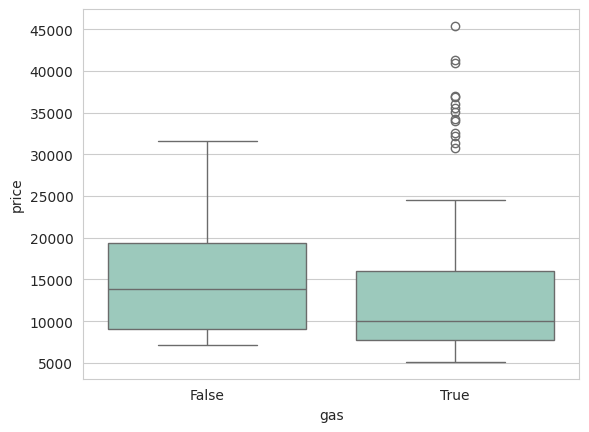

In [100]:
sns.boxplot(data=df, x="gas", y="price")

# MODEL

In [101]:
from sklearn.model_selection import train_test_split

# using all the features to predict the price

In [102]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(["price"], axis=1), df["price"], test_size=0.25, random_state=442)

In [103]:
from sklearn.linear_model import LinearRegression

In [104]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [105]:
prediction = linear_model.predict(X_test)

Text(0, 0.5, 'Predicted Y')

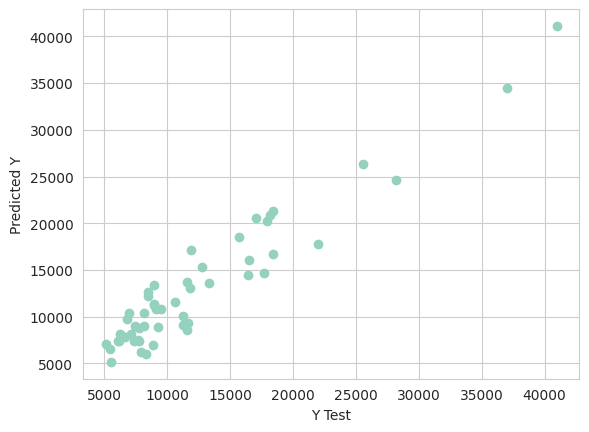

In [106]:
plt.scatter(y_test,prediction)
plt.xlabel("Y Test")
plt.ylabel("Predicted Y")

In [107]:
from sklearn import metrics

In [108]:
print("MAE: ", metrics.mean_absolute_error(y_test, prediction))
print("MSE: ", metrics.mean_squared_error(y_test, prediction))
print("MRSE: ", np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE:  1973.2371142657469
MSE:  5373177.255818631
MRSE:  2318.0114874216283


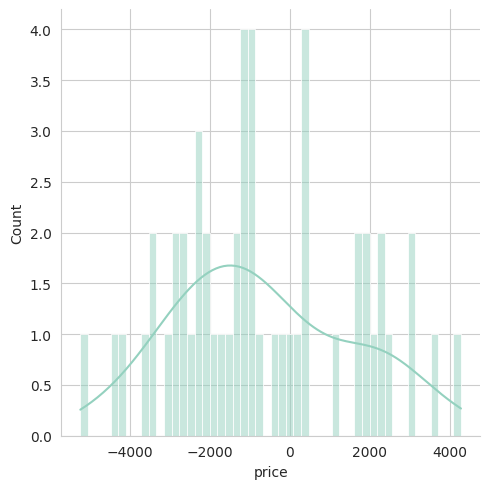

In [109]:
sns.displot((y_test-prediction), bins=50, kde=True)

# drop features that are not giving too useful info about the price

In [1126]:
#df.drop(["carbody","aspirationTurbo","engineRear","carheight","fuelsystem","boreratio","stroke","compressionratio","peakrpm","gas"], axis=1,inplace=True)
df.drop(["drivewheel","carlength","wheelbase","carwidth","curbweight","enginetype","citympg","highwaympg","car_ID","symboling","twoDoors","gas"], axis=1,inplace=True)

In [1127]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(["price"], axis=1), df["price"], test_size=0.25, random_state=442)

In [1128]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [1129]:
prediction = linear_model.predict(X_test)

Text(0, 0.5, 'Predicted Y')

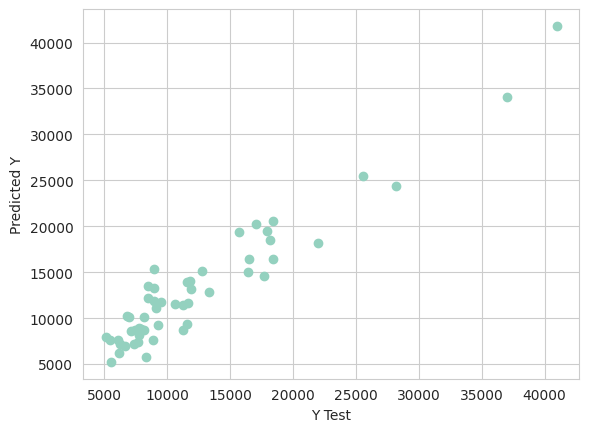

In [1130]:
plt.scatter(y_test,prediction)
plt.xlabel("Y Test")
plt.ylabel("Predicted Y")

In [1131]:
print("MAE: ", metrics.mean_absolute_error(y_test, prediction))
print("MSE: ", metrics.mean_squared_error(y_test, prediction))
print("MRSE: ", np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE:  1862.1859226653698
MSE:  5528585.283618689
MRSE:  2351.2943847206134


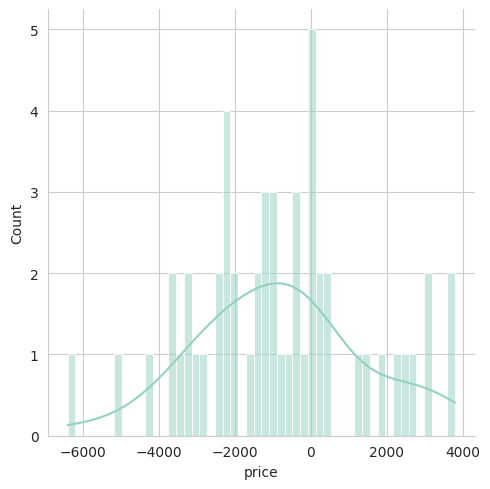

In [1132]:
sns.displot((y_test-prediction), bins=50, kde=True)